In [2]:
import numpy as np 
import pandas as pd
import scipy.linalg as la
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob
#import nfft 
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
#import dill 
import importlib as rl
import time as tm

import faoommfSim_LINUX as fas
import faoommfAna_LINUX as fana 



In [ ]:
"""
to convert omf or oef to odt, in the command prompt code 
tclsh oommf.tcl avf2odt -ipat "Path_to_files/FileName*" -average "line" -axis "z" -header "none"
"""

In [3]:
"""Imports Data from OOMMF files"""

Sim = fas.Simulation("/home/ons5/Desktop/oommf/Projects/Trilayer", #Base folder our data is stored in 
               [["/Magnetization Data Top/*.odt", 3], #Imports the Magnetization fields. Files must be in .odt format. '3' refers to 3 dimensional field
               ["/Energy Data Top/*.odt", 1]], #Imports the Energy fields. Files must be in .odt format. '1' refers to 1 dimensional field
               "/Simulation/SimTrilayer.odt", #Imports the data file from the simulaiton. This data file is where the time array is stored 
               ["Magnetization", "EnergyDensity"] #Name the fields that you import 
                    ) 

Importing Data
setting time array
Importing Fields
path0 /Magnetization Data Top/*.odt
path1 3
Checking and changing file format with avf2odt (may take quite a while, depending on how many files must be converted from .avf to .odt)


sh: line 0: cd: C:/Users/bgoul/Documents/oommf20a4/oommf/: No such file or directory
couldn't read file "oommf.tcl": no such file or directory
sh: move: command not found
mkdir: cannot create directory ‘avfFiles’: File exists


exit code avf2odt:  256
exit code to moving avf files:  32512
Importing Fields
Imported  0 Fields
Imported  100 Fields
Imported  200 Fields
Imported  300 Fields
Imported  400 Fields
Transposing data
path0 /Energy Data Top/*.odt
path1 1
Checking and changing file format with avf2odt (may take quite a while, depending on how many files must be converted from .avf to .odt)
exit code avf2odt:  256
exit code to moving avf files:  32512
Importing Fields
Imported  0 Fields


sh: line 0: cd: C:/Users/bgoul/Documents/oommf20a4/oommf/: No such file or directory
couldn't read file "oommf.tcl": no such file or directory
sh: move: command not found
mkdir: cannot create directory ‘avfFiles’: File exists


Imported  100 Fields
Imported  200 Fields
Imported  300 Fields
Imported  400 Fields
Transposing data


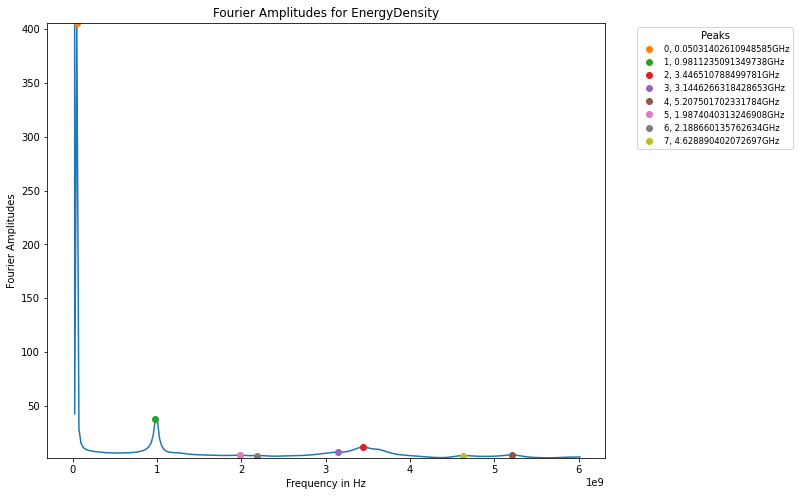

In [4]:
"""Plots FFT(Energy density) vs frequency"""
%matplotlib inline

peaksE = fana.vizFourierModes(Sim, 1) #1 refers to plotting the FFT of the 1th field of the Simulation object, in this case the 1th field is Energy density 



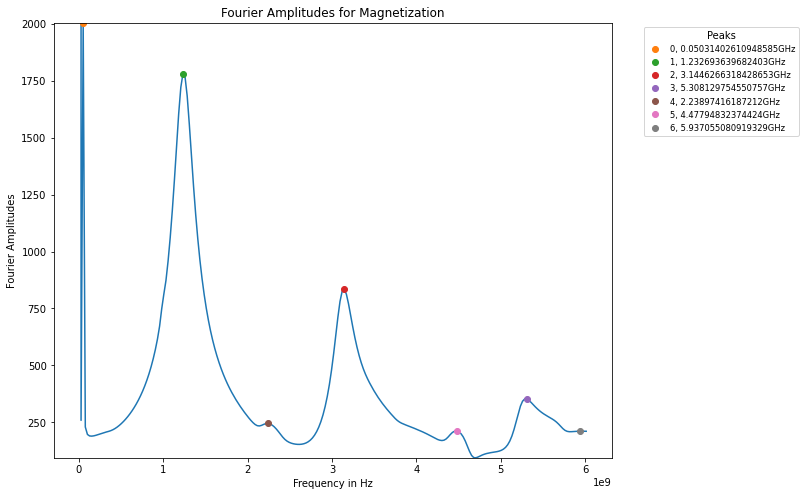

In [5]:
"""Plots (FFT(Mx)^2 +FFT(My)^2 +FFT(Mz)^2)^(1/2) vs frequency"""

%matplotlib inline
peaksM = fana.vizFourierModes(Sim, 0) #0 refers to plotting the FFT of the 0th field of the Simulation object, in this case the 0th field is M



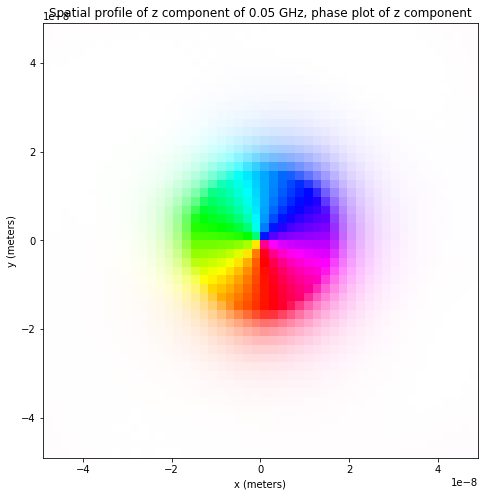

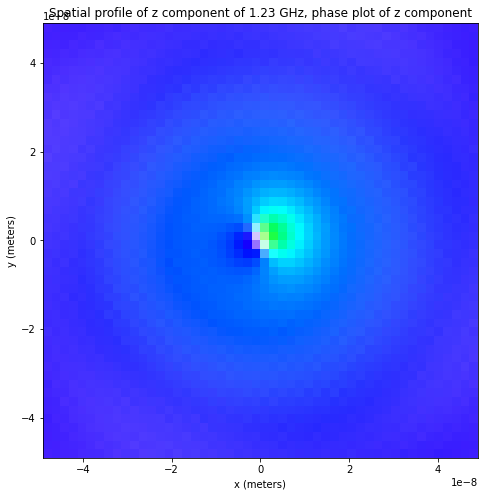

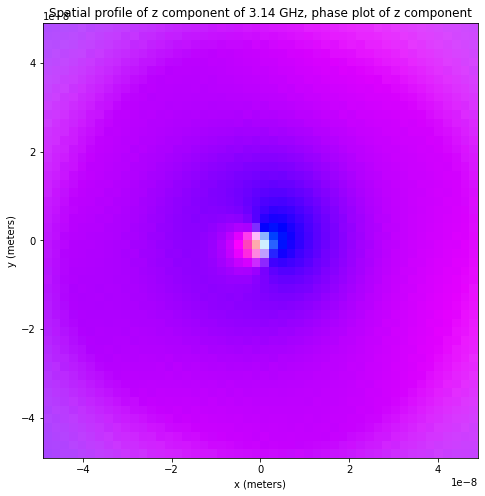

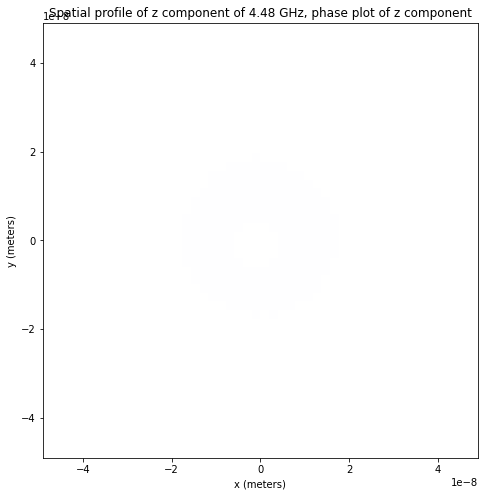

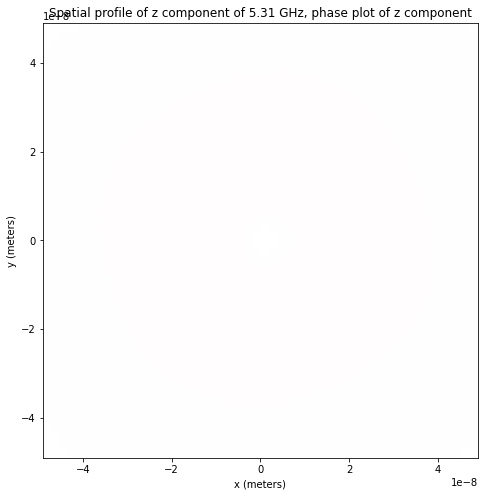

In [13]:
# """Spatial Profiles"""
%matplotlib inline

fana.vizFrequencyPhasePlot(Sim, 0, 0.05e9)

fana.vizFrequencyPhasePlot(Sim, 0, 1.23e9)

fana.vizFrequencyPhasePlot(Sim, 0, 3.14e9)

fana.vizFrequencyPhasePlot(Sim, 0, 4.477e9)

fana.vizFrequencyPhasePlot(Sim, 0, 5.308e9)



In [6]:
fana.vizCellFourierModes?

In [3]:
fana.vizFrequencyPhasePlot?

Signature:
fana.vizFrequencyPhasePlot(
    Sim_obj,
    fieldNumPhase,
    frequency,
    selectAxisPhase=2,
    fieldNumMag=None,
    selectAxisMag=None,
    ax=False,
    index=False,
    cmap=None,
    blackInactive=False,
    vmin=0,
    vmax=None,
    avg_lr=[0],
    save_data=False,
    data_title='Sim',
)
Docstring:
Plots the spatial profile of a certain frequency's fourier amplitude as a colormap. As of now, the colors need to be adjusted 
so that the base noise of fourier series doesn't bias the color gradient 

Parameters: 
---------------------------------------------------------------------------------------------------------
Sim_obj: faoommf Simulation object
    The simulation object to be used
fieldNumPhase: int
    The index of the field in the simulation you want vizualize the FFTs 
frequency: float 
    The frequency that the fourier amplitude spatial profile will be plotted
selectAxisMag: 
    axis, True if want dimentions averaged, int if you want to pick an axis, N